In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
pd.set_option('display.max_rows', None)

In [2]:
# Loading the dataset
df = pd.read_csv('/kaggle/input/nutrition-daily-meals-in-diseases-cases/Food_and_Nutrition__.csv')
display(df.head())

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.0,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.0,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


In [3]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

In [4]:
# Checking for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [5]:
# Basic statistics
df.describe()

,Ages,Height,Weight,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,43.961720,174.130153,78.064193,2275.171967,139.898115,126.192580,27.979623,2196.440518,252.385159,30.286219,69.700824
std,15.915002,13.420936,16.949264,558.812405,53.326588,34.938902,10.665318,571.089569,69.877804,8.385337,21.430707
min,18.000000,150.000000,48.000000,1200.000000,50.000000,60.000000,10.000000,990.000000,120.000000,14.400000,30.000000
25%,30.000000,163.250000,64.000000,1800.000000,100.000000,100.000000,20.000000,1770.250000,200.000000,24.000000,52.000000
50%,42.000000,174.000000,78.000000,2200.000000,136.000000,124.000000,27.200000,2146.000000,248.000000,29.760000,69.000000
75%,57.000000,185.000000,91.000000,2689.000000,174.000000,150.000000,34.800000,2549.750000,300.000000,36.000000,85.000000
max,79.000000,200.000000,119.000000,4364.000000,327.000000,218.000000,65.400000,4357.000000,436.000000,52.320000,145.000000


In [6]:
# Looking at Target Column ('Disease')
print(df['Disease'].value_counts())

Disease
Weight Gain                                                                 1312
Weight Gain, Hypertension, Heart Disease                                     129
Weight Gain, Kidney Disease                                                   91
Weight Gain, Hypertension, Heart Disease, Kidney Disease                      82
Diabetes, Acne, Weight Gain, Hypertension, Heart Disease                      45
Diabetes, Acne, Hypertension, Heart Disease                                   14
Hypertension, Heart Disease                                                    9
Diabetes, Acne, Weight Gain, Hypertension, Heart Disease, Kidney Disease       5
Hypertension, Heart Disease, Kidney Disease                                    4
Kidney Disease                                                                 3
Hypertension, Kidney Disease                                                   2
Diabetes, Acne, Hypertension, Kidney Disease                                   1
Diabetes, Acne, Weig

In [7]:
# Creating a copy of the original data to avoid modifying it
data_exploded = df.copy()

# Spliting the 'Disease' column into multiple labels
data_exploded['Disease'] = data_exploded['Disease'].str.split(', ')

# Explode the 'Disease' column into separate rows
data_exploded = data_exploded.explode('Disease')

# Counting the frequency of each disease
disease_counts = data_exploded['Disease'].value_counts()
display(disease_counts)

common_diseases = disease_counts.index

Disease
Weight Gain       1664
Hypertension       292
Heart Disease      289
Kidney Disease     189
Diabetes            66
Acne                66
Weight Loss          1
Name: count, dtype: int64

In [8]:
# Generating binary columns for each disease (0 or 1) one-hot encoding
for disease in common_diseases:
    data_exploded[disease] = (data_exploded['Disease'] == disease).astype(int)

display(data_exploded.head())

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Suggestion,Snack Suggestion,Disease,Weight Gain,Hypertension,Heart Disease,Kidney Disease,Diabetes,Acne,Weight Loss
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain,1,0,0,0,0,0,0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,Vegetable stir-fry with brown rice,Apple with almond butter,Weight Gain,1,0,0,0,0,0,0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,Vegetable stir-fry with brown rice,Apple with almond butter,Hypertension,0,1,0,0,0,0,0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,Vegetable stir-fry with brown rice,Apple with almond butter,Heart Disease,0,0,1,0,0,0,0
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,Lentil and vegetable curry,Trail mix,Weight Gain,1,0,0,0,0,0,0


# Univariate Analysis


In [9]:
# def distribution_graph(Column, theme="purple"):
#     sample = df[Column]
#     q_one = np.quantile(sample, 0.25)
#     q_three = np.quantile(sample, 0.75)
#     iqr = q_three - q_one
#     mean = np.mean(sample)
#     median = np.median(sample)

#     plt.figure(figsize=(8, 4)) 
#     sns.set_theme(style="whitegrid")
#     sns.histplot(sample, kde=True, color=theme, alpha=0.5)

#     # Adding IQR range, mean, and median lines
#     plt.axvline(q_one, color=theme, linestyle='--', label=f'Q1 {int(q_one.round())}', linewidth=1, alpha=0.8)
#     plt.axvline(q_three, color=theme, linestyle='--', label=f'Q3 {int(q_three.round())}', linewidth=1, alpha=0.8)
#     plt.axvline(mean, color=theme, linestyle='-', label=f'Mean {int(mean.round())}', linewidth=1, alpha=0.8)
#     plt.axvline(median, color=theme, linestyle='-', label=f'Median {int(median.round())}', linewidth=1, alpha=0.3)
    
#     plt.xlabel(Column)
#     plt.ylabel('Count')
#     plt.title(f'Distribution of {Column} Content')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
    

In [10]:
from scipy.stats import pointbiserialr

# List of binary columns (health conditions and weight goals)
binary_cols = ['Acne', 'Diabetes', 'Heart Disease', 'Hypertension', 'Kidney Disease', 'Weight Gain', 'Weight Loss']

# List of numerical columns (nutrients)
numerical_cols = ['Daily Calorie Target', 'Protein', 'Sugar', 'Sodium', 'Calories',
                  'Carbohydrates', 'Fiber', 'Fat']

results = []

# Performing point biserial correlation for each binary-numerical column pair
for col in binary_cols:
    for num_col in numerical_cols:
        # Calculating the point biserial correlation and p-value
        corr, p_value = pointbiserialr(data_exploded[col], data_exploded[num_col])
        # Storing results in the results list
        results.append({'Binary Column': col, 'Numerical Column': num_col, 
                        'Correlation': corr, 'P-value': p_value})

results_df = pd.DataFrame(results)

# Filtering significant correlations (p-value < 0.05)
significant_results = results_df[results_df['P-value'] < 0.05]

# Sorting the significant results by the absolute value of the correlation for easier interpretation
significant_results = significant_results.sort_values(by='Correlation', key=abs, ascending=False)

# Displaying the significant correlations
print("\nSignificant Correlations (p-value < 0.05) sorted by Absolute Correlation Value:")
print(significant_results[['Binary Column', 'Numerical Column', 'Correlation', 'P-value']])


Significant Correlations (p-value < 0.05) sorted by Absolute Correlation Value:
     Binary Column      Numerical Column  Correlation        P-value
47     Weight Gain                   Fat     0.572663  1.223544e-223
44     Weight Gain              Calories     0.507376  5.151189e-168
43     Weight Gain                Sodium     0.461203  2.124152e-135
41     Weight Gain               Protein     0.461203  2.124152e-135
40     Weight Gain  Daily Calorie Target     0.387458   1.016517e-92
31    Hypertension                   Fat    -0.331949   4.454052e-67
23   Heart Disease                   Fat    -0.328945   7.834710e-66
35  Kidney Disease                Sodium    -0.312046   4.378664e-59
33  Kidney Disease               Protein    -0.312046   4.378664e-59
42     Weight Gain                 Sugar     0.288839   1.634794e-50
45     Weight Gain         Carbohydrates     0.288839   1.634794e-50
46     Weight Gain                 Fiber     0.288839   1.634794e-50
28    Hypertension    

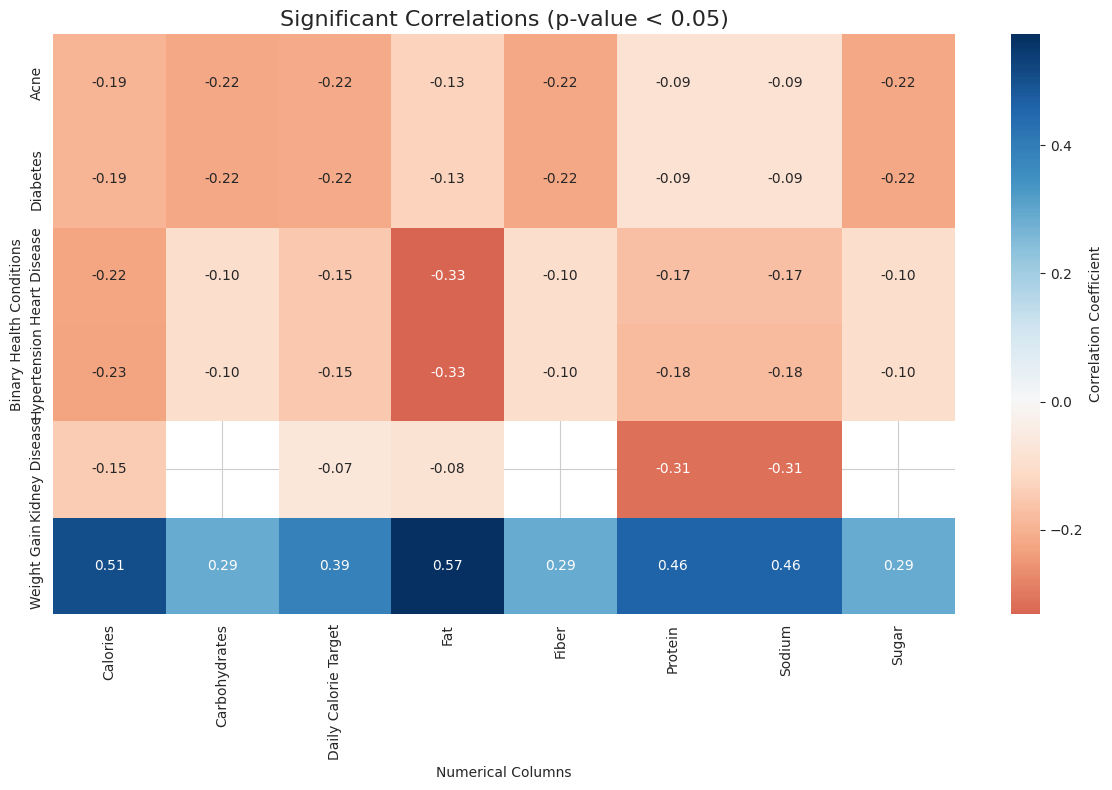

In [11]:
# Pivot the significant results to create a matrix
corr_matrix = significant_results.pivot_table(index='Binary Column', columns='Numerical Column', values='Correlation')

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Significant Correlations (p-value < 0.05)', fontsize=16)
plt.xlabel('Numerical Columns')
plt.ylabel('Binary Health Conditions')

plt.tight_layout()
plt.show()

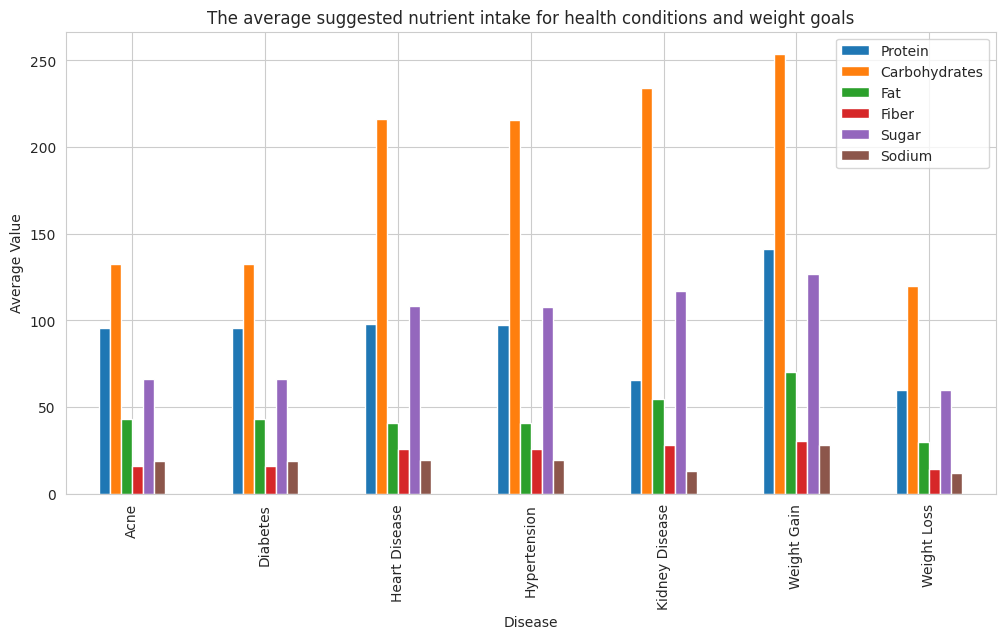

In [12]:
# Average nutrient content by disease
nutrient_means = data_exploded.groupby('Disease')[['Protein', 'Carbohydrates', 'Fat', 'Fiber','Sugar', 'Sodium']].mean()

# nutrient distributions
nutrient_means.plot(kind='bar', figsize=(12, 6))
plt.title('The average suggested nutrient intake for health conditions and weight goals')
plt.ylabel('Average Value')
plt.show()

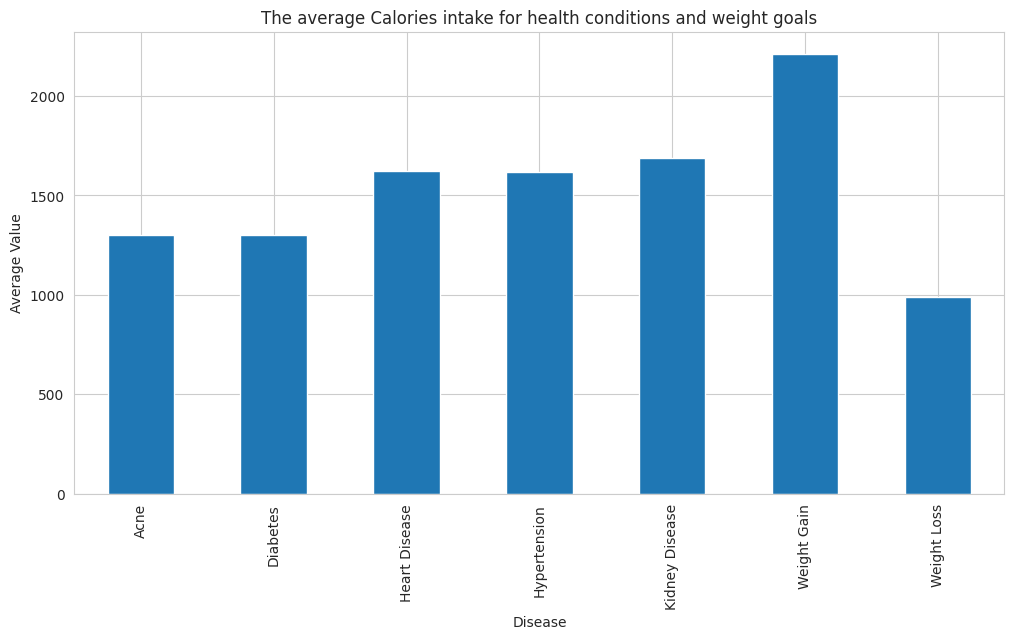

In [13]:
data_exploded.groupby('Disease')["Calories"].mean().plot(kind='bar', figsize=(12, 6))
plt.title('The average Calories intake for health conditions and weight goals')
plt.ylabel('Average Value')
plt.show()

In [14]:
# def average_nutritions(input_disease):
#     disease_data = grouped_data.loc[input_disease]
#     print(f"Average Nutritional Intake for {input_disease}:")
#     print(disease_data)

# average_nutritions('Hypertension')

In [15]:
# average_nutritions('Diabetes')

## Relationship between Categorical and Disease variables 
Disease variables: health conditions and weight goals

In [16]:
import pandas as pd
from scipy.stats import chi2_contingency

# Performing Chi-square test on the pairs
cat_pairs = [('Gender', 'Disease'), ('Activity Level', 'Disease'), ('Dietary Preference', 'Disease')]

for cat1, cat2 in cat_pairs:
    contingency_table = pd.crosstab(data_exploded[cat1], data_exploded[cat2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test between {cat1} and {cat2}: chi2={chi2:.2f}, p-value={p:.4f}")

Chi-square test between Gender and Disease: chi2=104.45, p-value=0.0000
Chi-square test between Activity Level and Disease: chi2=271.23, p-value=0.0000
Chi-square test between Dietary Preference and Disease: chi2=97.86, p-value=0.0000


The Chi-square tests for the relationships between categorical variables and disease types reveal significant associations:

- **Gender and Disease**: The Chi-square value is 104.45 with a p-value of 0.0000, indicating a strong relationship between gender and disease. The types of diseases in the dataset are not equally distributed across genders. Some diseases may be more prevalent in one gender than the other, indicating a potential gender-based variation in disease occurrence.

- **Activity Level and Disease**: There is a statistically significant association between activity level and disease prevalence (p-value = 0.0000, chi-square value = 271.23). This suggests that physical activity plays a significant role in determining the likelihood of certain diseases, with varying prevalence across different levels of activity.
- **Dietary Preference and Disease**: The Chi-square value is 97.86 with a p-value of 0.0000, This indicates that individuals' dietary choices are likely to influence their likelihood of developing certain diseases, with different diseases being more common among specific dietary groups.


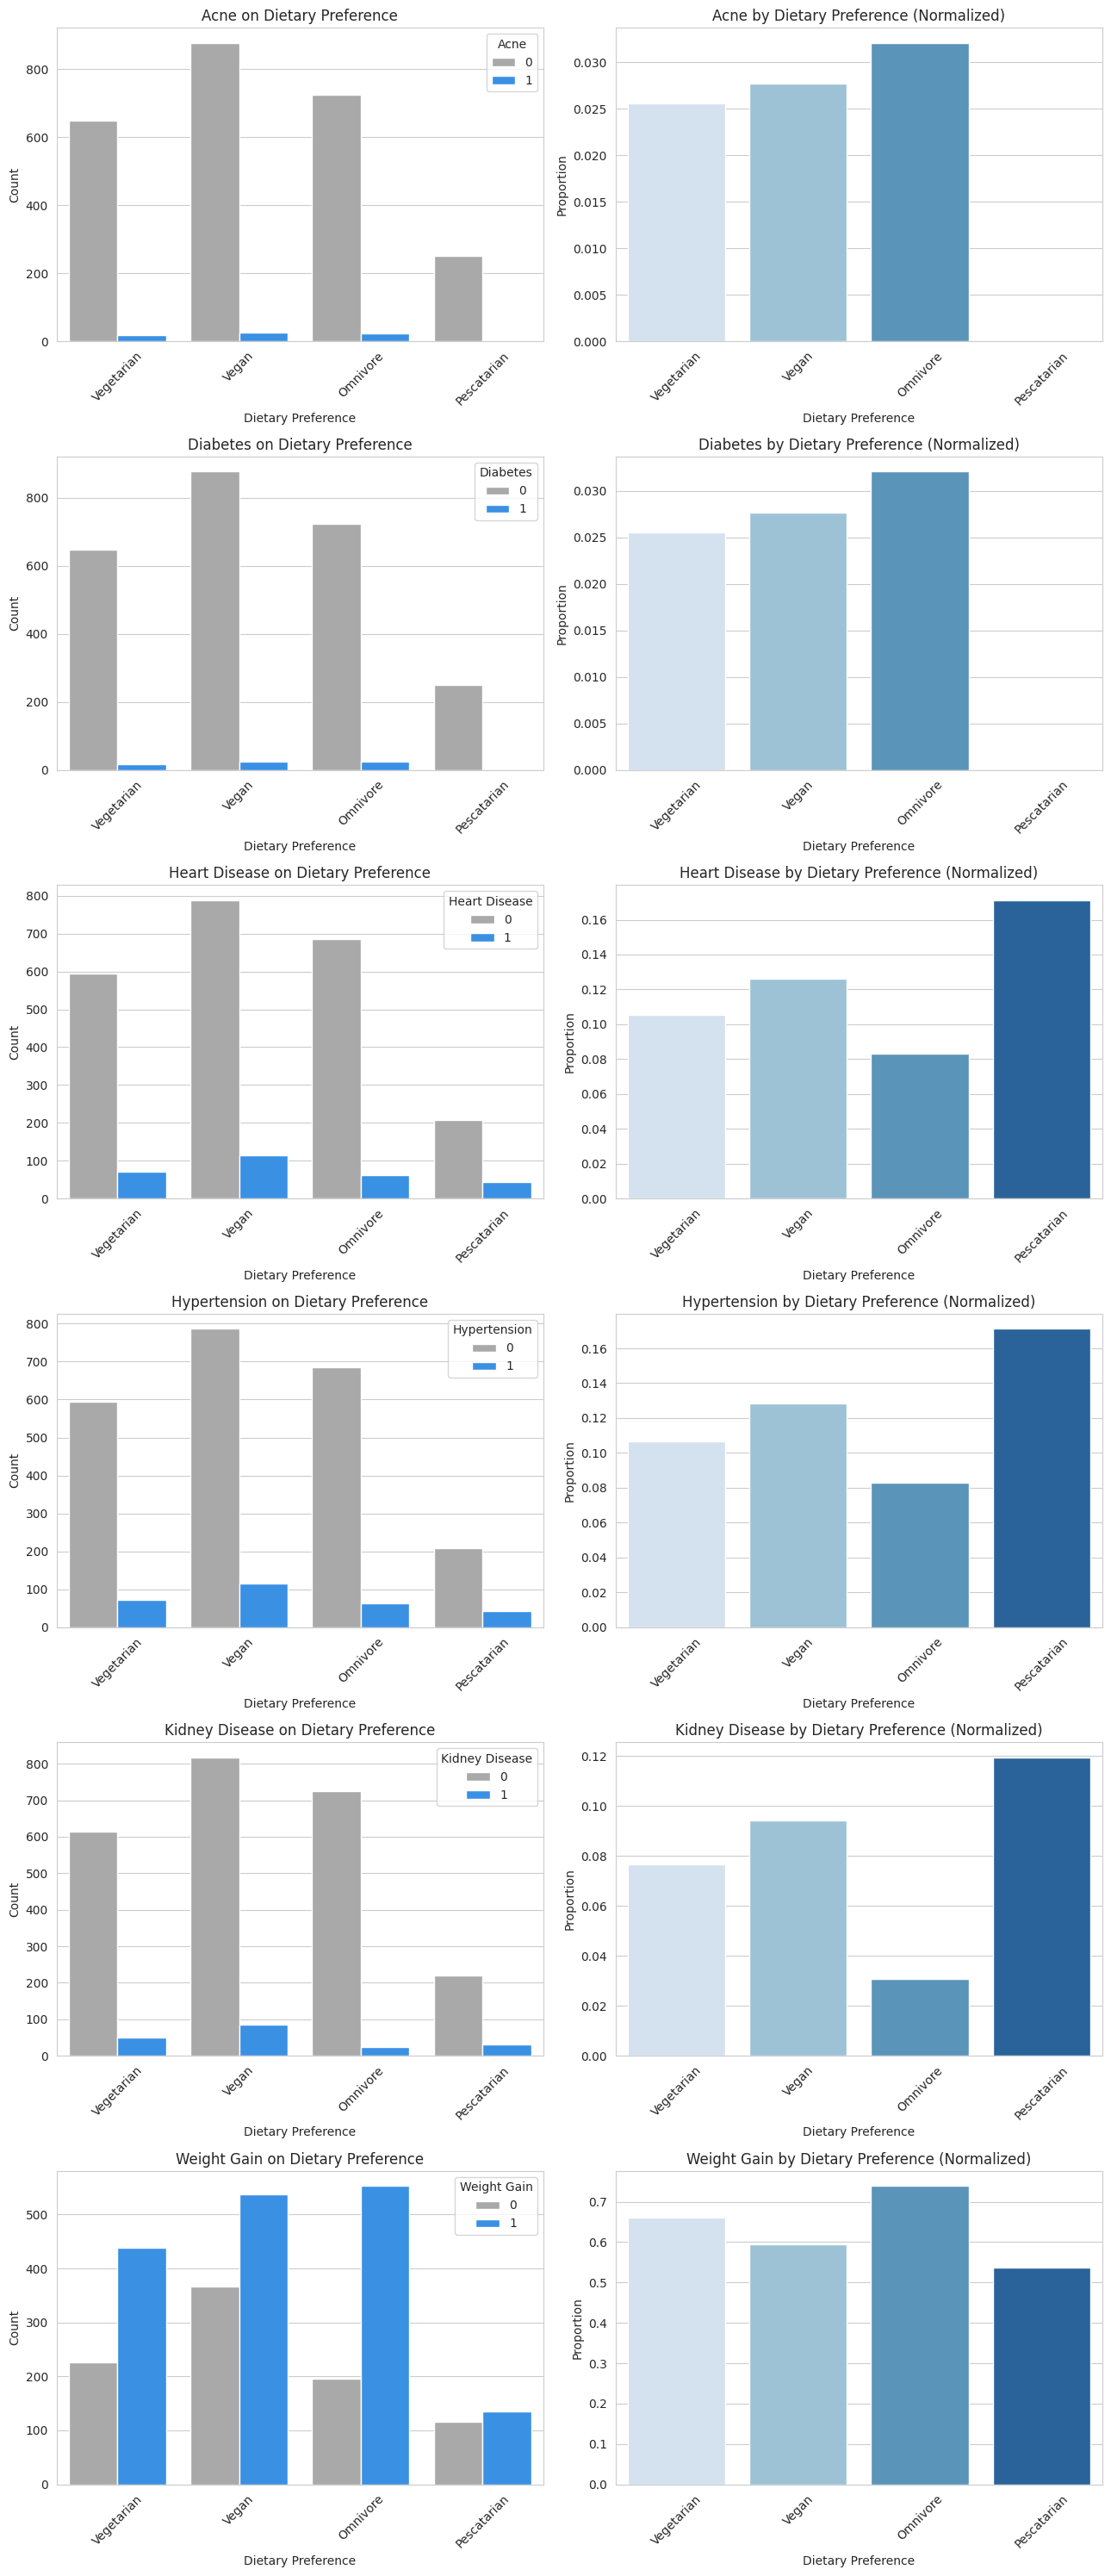

In [17]:
# List of binary columns (health conditions and weight goals)
binary_cols = ['Acne', 'Diabetes', 'Heart Disease', 'Hypertension', 'Kidney Disease', 'Weight Gain']
dietary_preference_order = ["Vegetarian", "Vegan", "Omnivore", "Pescatarian"]

# Number of rows for subplots (2 per row)
n_cols = 1 
n_rows = (len(binary_cols) + n_cols - 1) // n_cols 

# Create a subplot with enough space for both count plots and normalized plots
fig_activity, axes_activity = plt.subplots(n_rows, n_cols * 2, figsize=(13, 5 * n_rows))

# Flatten axes for easy iteration if there are multiple rows
axes_activity = axes_activity.flatten()

# Looping through each disease to create Dietary Preference vs Disease count and normalized plots
for i, disease in enumerate(binary_cols):
    # Count plot (Dietary Preference vs Disease)
    sns.countplot(data=data_exploded, x='Dietary Preference', hue=disease, order=dietary_preference_order, palette={0: '#A9A9A9', 1: 'dodgerblue'}, ax=axes_activity[i*2])
    axes_activity[i*2].set_title(f'{disease} on Dietary Preference')
    axes_activity[i*2].set_ylabel('Count')
    axes_activity[i*2].tick_params(axis='x', rotation=45)

    # Normalized plot (Dietary Preference vs Proportion of Disease)
    disease_counts_normalized = data_exploded.groupby(['Dietary Preference', disease]).size().unstack().fillna(0)
    disease_counts_normalized = disease_counts_normalized.div(disease_counts_normalized.sum(axis=1), axis=0)
    sns.barplot(x=disease_counts_normalized.index, y=disease_counts_normalized[1], ax=axes_activity[i*2 + 1], palette='Blues', order=dietary_preference_order)
    axes_activity[i*2 + 1].set_title(f'{disease} by Dietary Preference (Normalized)')
    axes_activity[i*2 + 1].set_ylabel('Proportion')
    axes_activity[i*2 + 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [18]:
# # List of binary columns (health conditions and weight goals)
# binary_cols = ['Acne', 'Diabetes', 'Heart Disease', 'Hypertension', 'Kidney Disease', 'Weight Gain']
# activity_order = ["Sedentary", "Lightly Active", "Moderately Active", "Very Active", "Extremely Active"]

# # Number of rows for subplots (2 per row)
# n_cols = 1 
# n_rows = (len(binary_cols) + n_cols - 1) // n_cols 

# # Create a subplot with enough space for both count plots and normalized plots
# fig_activity, axes_activity = plt.subplots(n_rows, n_cols * 2, figsize=(13, 5 * n_rows))

# # Flatten axes for easy iteration if there are multiple rows
# axes_activity = axes_activity.flatten()

# # Looping through each disease to create Activity Level vs Disease count and normalized plots
# for i, disease in enumerate(binary_cols):
#     # First, draw the count plot (Activity Level vs Disease)
#     sns.countplot(data=data_exploded, x='Activity Level', hue=disease, order=activity_order, palette={0: '#A9A9A9', 1: 'dodgerblue'}, ax=axes_activity[i*2])
#     axes_activity[i*2].set_title(f'{disease} on Activity Level')
#     axes_activity[i*2].set_ylabel('Count')
#     axes_activity[i*2].tick_params(axis='x', rotation=45)

#     # Then, draw the normalized plot (Activity Level vs Proportion of Disease)
#     disease_counts_normalized = data_exploded.groupby(['Activity Level', disease]).size().unstack().fillna(0)
#     disease_counts_normalized = disease_counts_normalized.div(disease_counts_normalized.sum(axis=1), axis=0)
#     sns.barplot(x=disease_counts_normalized.index, y=disease_counts_normalized[1], ax=axes_activity[i*2 + 1], palette=activity_palette, order=activity_order)
#     axes_activity[i*2 + 1].set_title(f'{disease} by Activity Level (Normalized)')
#     axes_activity[i*2 + 1].set_ylabel('Proportion')
#     axes_activity[i*2 + 1].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()


## Health Conditions Across Different Activity Levels

The graphs below show the relationship between different health conditions (Acne, Diabetes, Heart Disease, Hypertension, Kidney Disease, and Weight Gain) and various activity levels: Sedentary, Lightly Active, Moderately Active, Very Active, and Extremely Active.

### Insights

- **Overall Trend**: Higher activity levels generally correlate with lower rates of chronic conditions like Acne, Diabetes, Heart Disease, Hypertension, and Kidney Disease, suggesting that physical activity has a protective effect. **Extremely Active** individuals exhibit the lowest rates of these conditions, with no reported cases of Acne or Diabetes, while **Sedentary** individuals have the highest incidence of these conditions. For example, the rate of **Heart Disease** is notably higher in the **Sedentary** group (16.17%) compared to the **Extremely Active** group (0%). Conversely, when it comes to **Weight Gain**, more active individuals (especially those who are **Extremely Active** or **Very Active**) show higher rates, likely due to increased muscle mass and fitness goals, with **Extremely Active** individuals having a 100% rate of weight gain. **Sedentary** individuals show a more balanced rate of weight gain (47.65%). This suggests that while higher activity levels help in reducing the risk of chronic diseases, they also contribute to achieving specific fitness-related goals like muscle gain.


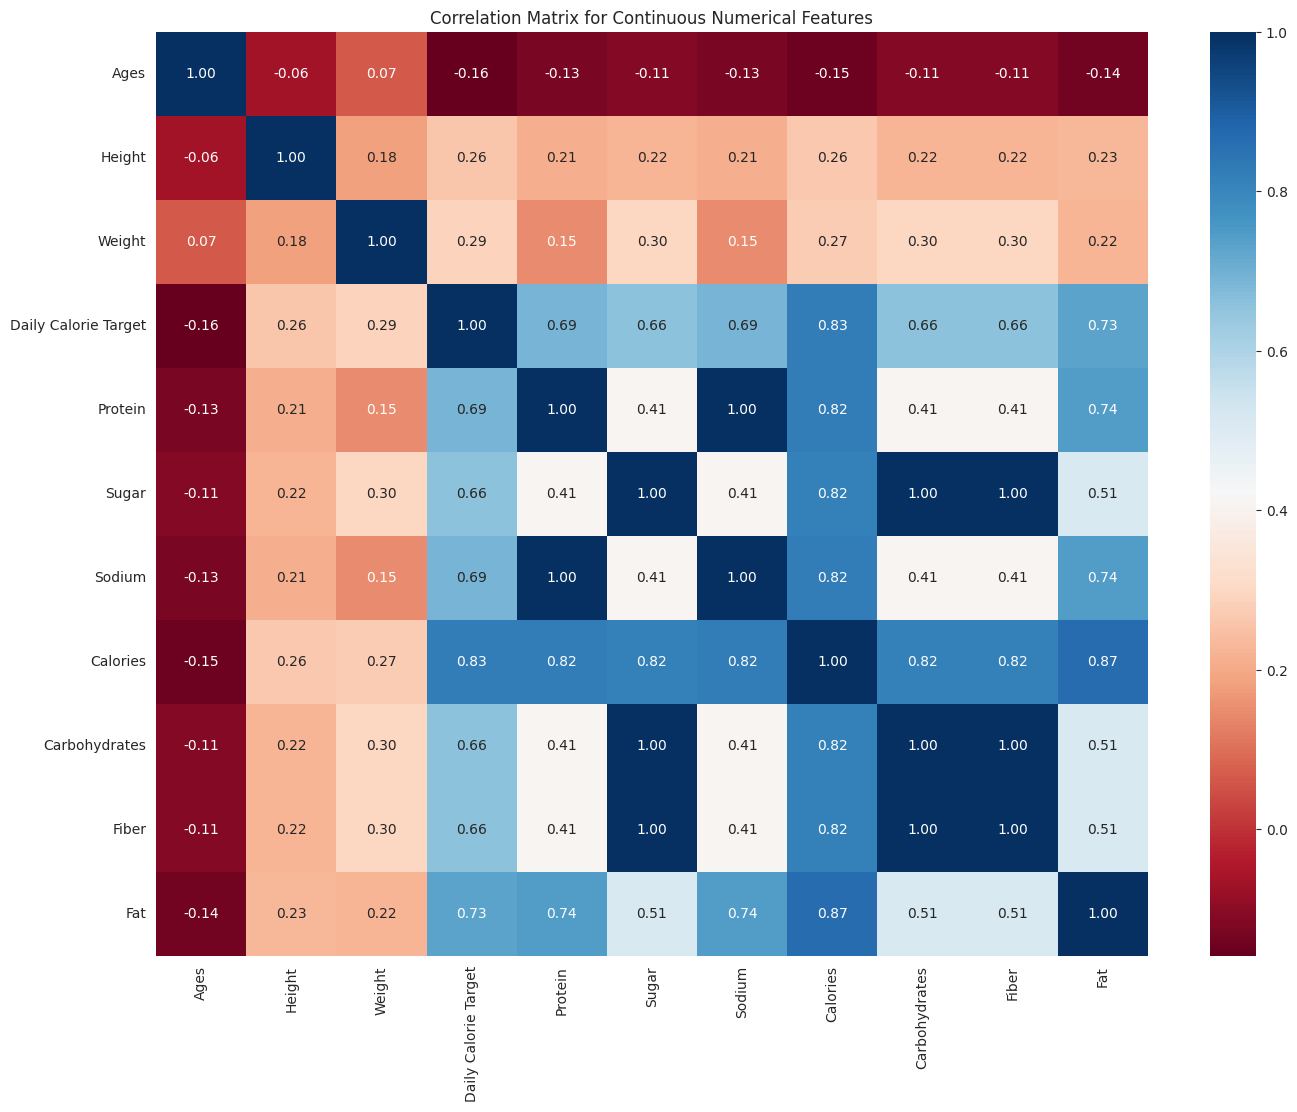

Correlation Heatmap Analysis:

Strong Positive Correlations (above 0.6):
Daily Calorie Target  Protein                 0.688599
                      Sugar                   0.656500
                      Sodium                  0.688599
                      Calories                0.825169
                      Carbohydrates           0.656500
                      Fiber                   0.656500
                      Fat                     0.730332
Protein               Daily Calorie Target    0.688599
                      Sodium                  1.000000
                      Calories                0.824346
                      Fat                     0.742495
Sugar                 Daily Calorie Target    0.656500
                      Calories                0.815888
                      Fiber                   1.000000
Sodium                Daily Calorie Target    0.688599
                      Protein                 1.000000
                      Calories                0

In [19]:
numerical_cols = ['Ages', 'Height', 'Weight', 'Daily Calorie Target', 'Protein', 'Sugar', 
                  'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat']

# Computing correlation matrix for numerical_cols
corr_matrix = df[numerical_cols].corr()

# Correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu', cbar=True)
plt.title("Correlation Matrix for Continuous Numerical Features")
plt.show()

print("Correlation Heatmap Analysis:")
strong_corr = corr_matrix[(corr_matrix > 0.6) & (corr_matrix != 1)].stack()
if not strong_corr.empty:
    print("\nStrong Positive Correlations (above 0.6):")
    print(strong_corr)

strong_neg_corr = corr_matrix[corr_matrix < -0.6].stack()
if not strong_neg_corr.empty:
    print("\nStrong Negative Correlations (below -0.6):")
    print(strong_neg_corr)
else:
    print("\n")


The correlation heatmap highlights interconnected dietary patterns where nutrients like protein, fat, sugar, sodium, and carbohydrates tend to vary together. For example, calorie intake strongly aligns with the intake of other nutrients, reflecting how dietary choices often encompass balanced or proportional consumption of macronutrients and energy sources. These relationships underscore the interconnected nature of nutrient intake, where an increase in one nutrient is often accompanied by changes in others, illustrating how different aspects of a diet influence each other in a typical nutritional profile.

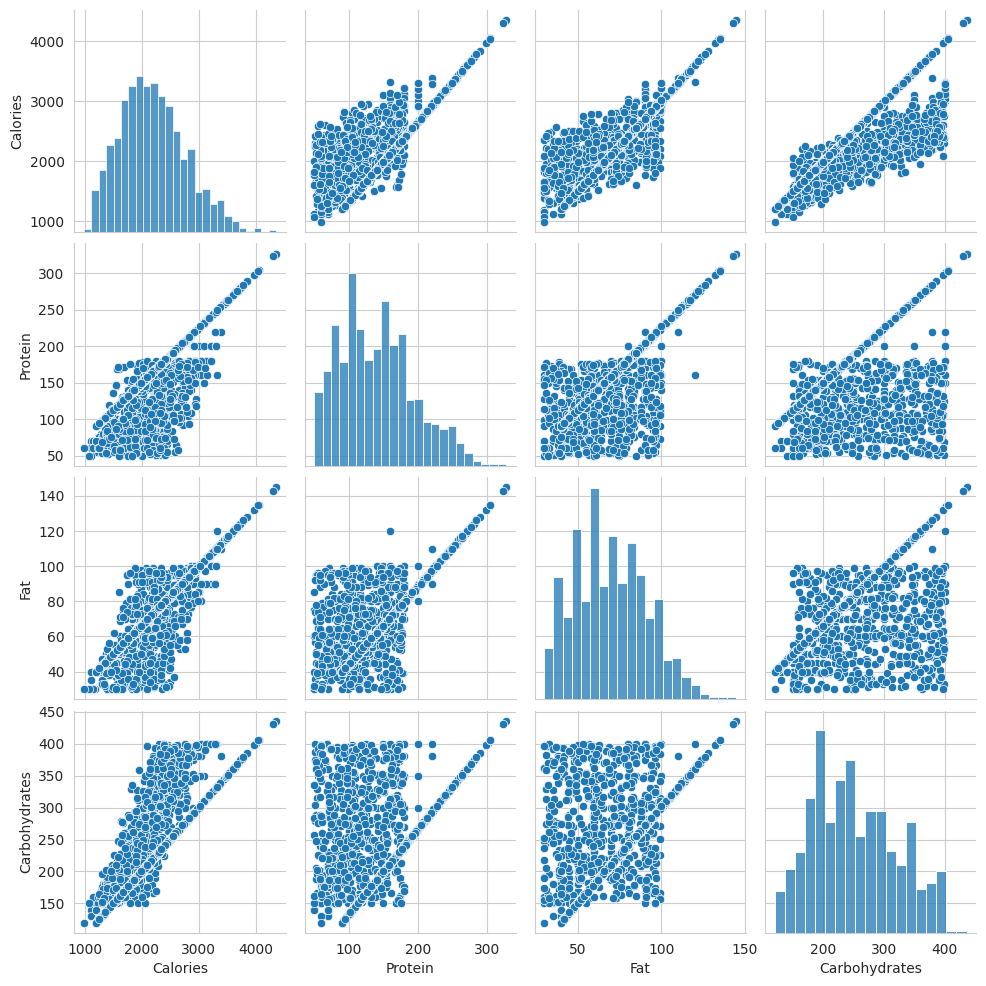

In [20]:
# Pairplot of Macronutrients
sns.pairplot(df[['Calories', 'Protein', 'Fat', 'Carbohydrates']])
plt.show()

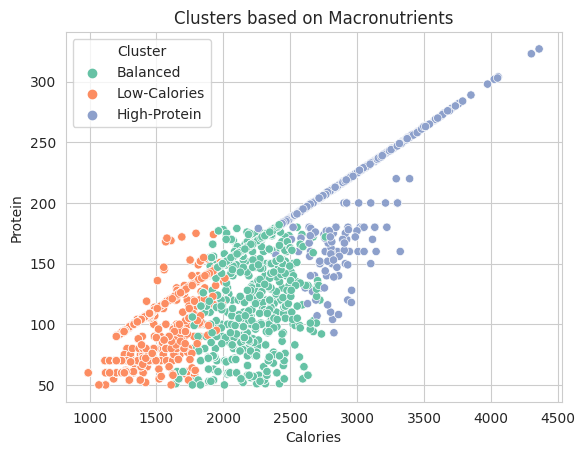

In [21]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

# Clustering with K-Means
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_exploded[['Calories', 'Protein', 'Fat', 'Carbohydrates']])

kmeans = KMeans(n_clusters=3, random_state=42)
data_exploded['Cluster'] = kmeans.fit_predict(scaled_data)

# Maping diet types to meaningful labels
diet_labels = {0: 'Balanced', 1: 'High-Protein', 2: 'Low-Calories'}
data_exploded['Cluster'] = data_exploded['Cluster'].map(diet_labels)

sns.scatterplot(x='Calories', y='Protein', hue='Cluster', data=data_exploded, palette='Set2')
plt.title("Clusters based on Macronutrients")
plt.show()

### Meals recommender

In [22]:
# def recommend_meals(user_input):
#     # Mapping numeric activity levels to corresponding labels
#     activity_map = {0: 'Sedentary', 1: 'Lightly Active', 2: 'Moderately Active', 3: 'Very Active'}
#     dietary_map = {0: 'Pescatarian', 1: 'Vegetarian', 2: "Vegan", 3: "Omnivore"}

#     # Extracting activity level and dietary preference
#     activity = activity_map.get(user_input.get('Activity Level'))
#     diet = dietary_map.get(user_input.get('Dietary Preference'))

#     # Splitting the diseases input to a list
#     #diseases = user_input.get('Disease', '').split(', ')

#     # Directly passing list
#     diseases = user_input.get('Disease', [])
    
#     # Checking if the diseases in the user input are in the exploded 'Disease' column
#     filtered = data_exploded[data_exploded['Disease'].isin(diseases)]

#     # Now we need to group by the index and check if all the diseases are present for each row
#     # This ensures we find records with all specified diseases
#     filtered = filtered.groupby(filtered.index).filter(lambda x: all(disease in x['Disease'].values for disease in diseases))

#     # Further filtering by activity level and dietary preference if provided
#     if activity:
#         filtered = filtered[filtered['Activity Level'] == activity]
#     if diet:
#         filtered = filtered[filtered['Dietary Preference'] == diet]

#     # Returning meal suggestions
#     if not filtered.empty:
#         return filtered[['Breakfast Suggestion', 'Lunch Suggestion', 
#                          'Dinner Suggestion', 'Snack Suggestion', 
#                          'Calories', 'Protein', 'Carbohydrates', 'Fat', 'Fiber', 'Sugar', 'Sodium','Dietary Preference'
#                         ]].drop_duplicates().reset_index(drop=True)
#     else:
#         return None

In [23]:
# pd.set_option('display.max_columns', None)

# user_input = {
#     'Disease': ['Hypertension',
#                 'Heart Disease',
#                 ],
#     'Activity Level': 1,  # 0: Sedentary, 1: Lightly Active, 2: Moderately Active, 3: Very Active
#     'Dietary Preference': 0  # 0: Seafood, 1: Vegetarian, 2: Vegan, 3: Omnivore
# }

# meal_recommendations = recommend_meals(user_input)
# meal_recommendations

In [24]:
# user_input = {
#     'Disease': ['Weight Gain',
#                 'Hypertension',
#                 'Heart Disease',
#                 'Diabetes'],
#     'Activity Level': None,  # 0: Sedentary, 1: Lightly Active, 2: Moderately Active, 3: Very Active, None: all
#     'Dietary Preference': 3  # 0: Seafood, 1: Vegetarian, 2: Vegan, 3: Omnivore, None: all
# }

# recommend_meals(user_input)

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def recommend_meals(user_input, meals_data):
    activity_map = {0: 'Sedentary', 1: 'Lightly Active', 2: 'Moderately Active', 3: 'Very Active'}
    dietary_map = {0: 'Pescatarian', 1: 'Vegetarian', 2: 'Vegan', 3: 'Omnivore'}

    activity = activity_map.get(user_input.get('Activity Level'))
    diet = dietary_map.get(user_input.get('Dietary Preference'))
    diseases = user_input.get('Disease', [])

    # Ensure Disease column is a list
    meals_data = meals_data.copy()
    meals_data['Disease'] = meals_data['Disease'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

    # Filter by diseases (any match)
    filtered = meals_data[meals_data['Disease'].apply(lambda x: any(disease in x for disease in diseases))]

    # Further filter by activity level & dietary preference
    if activity:
        filtered = filtered[filtered['Activity Level'] == activity]
    if diet:
        filtered = filtered[filtered['Dietary Preference'] == diet]

    # If no matching meals, return None
    if filtered.empty:
        return None

    # Prepare meal data for similarity calculation
    meal_vectors = filtered[['Calories', 'Protein', 'Carbohydrates', 'Fat', 'Fiber', 'Sugar', 'Sodium']].values

    # Compute cosine similarity using an average meal vector
    user_vector = meal_vectors.mean(axis=0).reshape(1, -1)  # User’s nutritional profile as avg of filtered meals
    similarity_scores = cosine_similarity(user_vector, meal_vectors)[0]

    # Assign similarity scores and sort meals
    filtered['Similarity'] = similarity_scores
    recommended_meals = filtered.sort_values(by='Similarity', ascending=False).head(5)  # Top 5 recommendations

    return recommended_meals[['Breakfast Suggestion', 'Lunch Suggestion', 
                          'Dinner Suggestion', 'Snack Suggestion', 
                           'Similarity']]


# Example user input
user_input = {
    'Disease': ['Hypertension', 'Heart Disease'],
    'Activity Level': 1,
    'Dietary Preference': 0
}

# Load meals data (assuming it's a Pandas DataFrame)
# meals_data = pd.read_csv("meals_data.csv")  # Uncomment if reading from a CSV

meal_recommendations = recommend_meals(user_input, df)

# Print recommendations
print(meal_recommendations)


             Breakfast Suggestion            Lunch Suggestion  \
897  Smoothie with protein powder             Turkey sandwich   
896      Fruit and yogurt parfait       Grilled chicken salad   
817     Vegan pancakes with syrup             Turkey sandwich   
788          Oatmeal with berries  Avocado and chickpea salad   
696     Vegan pancakes with syrup             Veggie stir-fry   

             Dinner Suggestion          Snack Suggestion  Similarity  
897  Pasta with marinara sauce        Hummus and veggies    0.999955  
896  Pasta with marinara sauce  Apple with almond butter    0.999936  
817  Baked salmon with veggies                 Trail mix    0.999922  
788  Baked salmon with veggies    Greek yogurt with nuts    0.999640  
696  Baked salmon with veggies               Protein bar    0.999595  


In [26]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [27]:
from tabulate import tabulate

def print_readable_meals(meal_recommendations):
    """
    Prints the meal recommendations DataFrame in a more readable table format.
    """
    print(tabulate(meal_recommendations, headers="keys", tablefmt="fancy_grid", showindex=False))

# Example usage:
print_readable_meals(meal_recommendations)


╒══════════════════════════════╤════════════════════════════╤═══════════════════════════╤══════════════════════════╤══════════════╕
│ Breakfast Suggestion         │ Lunch Suggestion           │ Dinner Suggestion         │ Snack Suggestion         │   Similarity │
╞══════════════════════════════╪════════════════════════════╪═══════════════════════════╪══════════════════════════╪══════════════╡
│ Smoothie with protein powder │ Turkey sandwich            │ Pasta with marinara sauce │ Hummus and veggies       │     0.999955 │
├──────────────────────────────┼────────────────────────────┼───────────────────────────┼──────────────────────────┼──────────────┤
│ Fruit and yogurt parfait     │ Grilled chicken salad      │ Pasta with marinara sauce │ Apple with almond butter │     0.999936 │
├──────────────────────────────┼────────────────────────────┼───────────────────────────┼──────────────────────────┼──────────────┤
│ Vegan pancakes with syrup    │ Turkey sandwich            │ Baked salmon w